# Prep 

## Import Statements

In [1]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import os

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/slmurley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read in Data

In [2]:
df = pd.read_csv("data/cleaned_text_data.csv")

In [3]:
len(df)

2574

In [4]:
df = df[df['subreddit'] != 'healthinsurance']

In [5]:
len(df)

2006

In [6]:
print(list(df.columns))

['id', 'title', 'text', 'subreddit', 'score', 'num_comments', 'url', 'created_utc', 'date', 'text_length', 'word_count', 'clean_text']


In [7]:
# Convert created_utc to datetime
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

In [8]:
# Metadata summary
print("---- Metadata Summary ----")
print(df[['score', 'num_comments']].describe())
print("\nSubreddit distribution:")
print(df['subreddit'].value_counts(normalize=True) * 100)

# Text processing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [t for t in text.split() if t not in stop_words]
    return tokens

all_text = df['title'].fillna('') + " " + df['text'].fillna('')
all_tokens = all_text.apply(clean_text).sum()

word_counts = Counter(all_tokens)
print("\n---- 20 Most Common Words ----")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

# Optional: average words per post
df['num_words'] = all_text.apply(lambda x: len(clean_text(x)))
print("\nAverage words per post:", df['num_words'].mean())

---- Metadata Summary ----
             score  num_comments
count  2006.000000   2006.000000
mean      7.902792     16.224327
std      53.278350     25.497592
min       0.000000      0.000000
25%       1.000000      4.000000
50%       2.000000      9.000000
75%       5.000000     19.000000
max    2110.000000    323.000000

Subreddit distribution:
subreddit
medicaid    50.797607
medicare    49.202393
Name: proportion, dtype: float64

---- 20 Most Common Words ----
medicaid: 3397
medicare: 3042
im: 1815
plan: 1653
get: 1246
insurance: 1119
would: 1113
part: 990
income: 983
dont: 807
year: 804
know: 774
coverage: 758
need: 733
help: 680
month: 670
health: 654
care: 632
pay: 619
also: 606

Average words per post: 79.7173479561316


In [9]:
# Continuous variables summary
print("\n--- Descriptive Statistics ---")
print(df[['score', 'num_comments']].describe())


--- Descriptive Statistics ---
             score  num_comments
count  2006.000000   2006.000000
mean      7.902792     16.224327
std      53.278350     25.497592
min       0.000000      0.000000
25%       1.000000      4.000000
50%       2.000000      9.000000
75%       5.000000     19.000000
max    2110.000000    323.000000


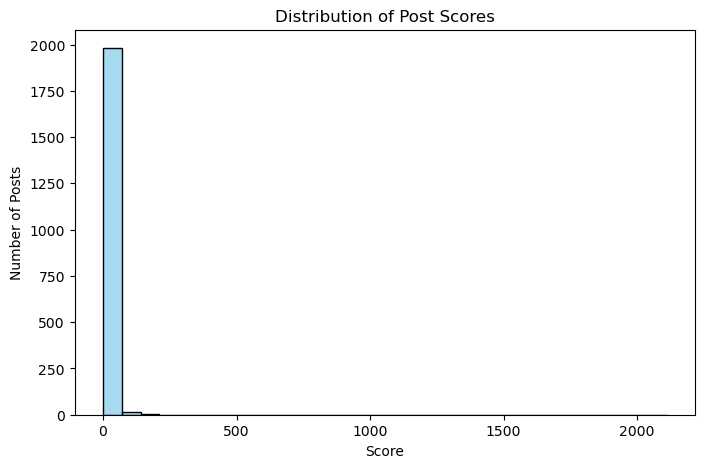

In [10]:
# Histogram of post scores
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=30, kde=False, color='skyblue')
plt.title("Distribution of Post Scores")
plt.xlabel("Score")
plt.ylabel("Number of Posts")
plt.show()

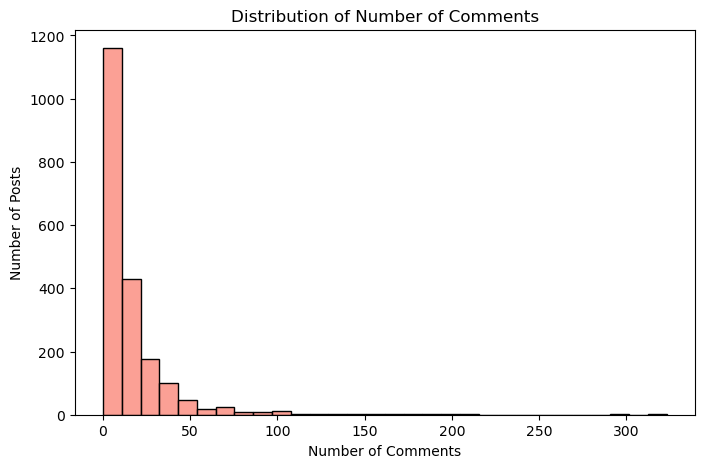

In [11]:
# Histogram of number of comments
plt.figure(figsize=(8,5))
sns.histplot(df['num_comments'], bins=30, kde=False, color='salmon')
plt.title("Distribution of Number of Comments")
plt.xlabel("Number of Comments")
plt.ylabel("Number of Posts")
plt.show()


--- Subreddit Frequency ---
subreddit
medicaid    1019
medicare     987
Name: count, dtype: int64


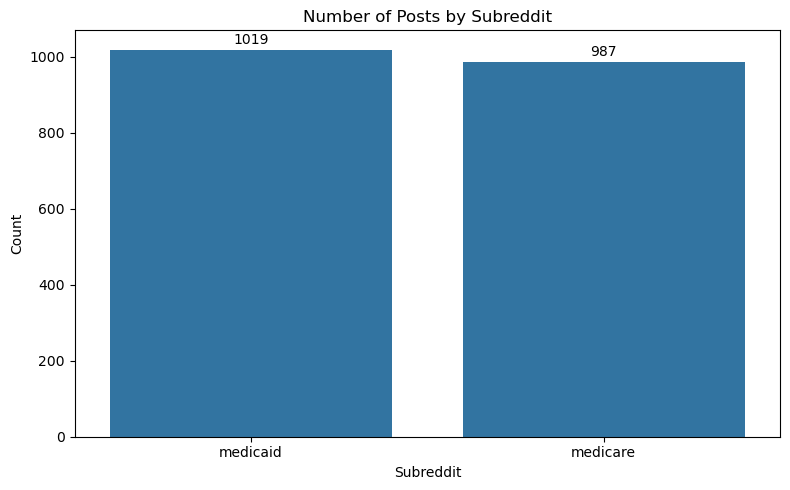

In [12]:
# Categorical variables summary 
print("\n--- Subreddit Frequency ---")
print(df['subreddit'].value_counts())

plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=df,
    x='subreddit',
    order=df['subreddit'].value_counts().index
)

plt.title("Number of Posts by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Count")

# Add labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10, color='black')

plt.tight_layout()
plt.show()


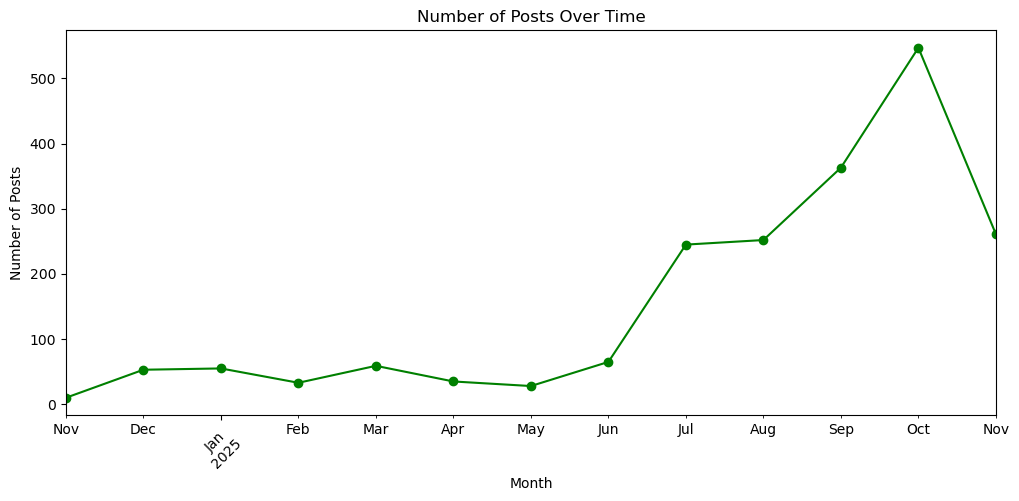

In [13]:
# Time trend
monthly_counts = df.groupby('month').size()
plt.figure(figsize=(12,5))
monthly_counts.plot(kind='line', marker='o', color='green')
plt.title("Number of Posts Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Text corpus summary 
# Most frequent words
most_common_words = word_counts.most_common(20)
print("\n--- 20 Most Common Words ---")
for word, count in most_common_words:
    print(f"{word}: {count}")


--- 20 Most Common Words ---
medicaid: 3397
medicare: 3042
im: 1815
plan: 1653
get: 1246
insurance: 1119
would: 1113
part: 990
income: 983
dont: 807
year: 804
know: 774
coverage: 758
need: 733
help: 680
month: 670
health: 654
care: 632
pay: 619
also: 606


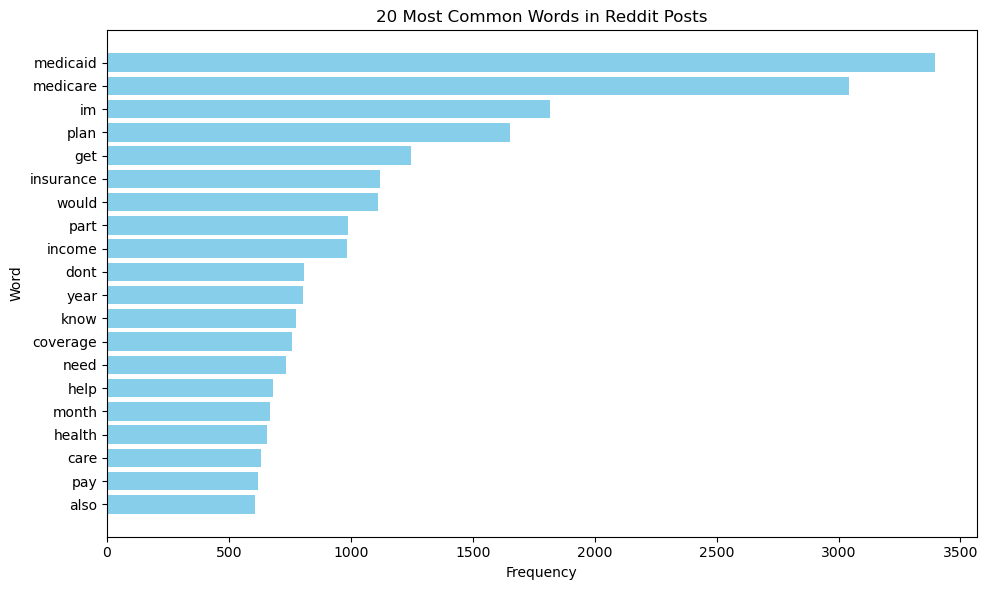

In [15]:
# --- Horizontal bar chart of most common words ---
most_common_words = Counter(all_tokens).most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10,6))
plt.barh(words[::-1], counts[::-1], color='skyblue')  # reverse for descending order
plt.title("20 Most Common Words in Reddit Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.savefig("figures/most_common_words.png")
plt.show()

In [16]:
df.columns

Index(['id', 'title', 'text', 'subreddit', 'score', 'num_comments', 'url',
       'created_utc', 'date', 'text_length', 'word_count', 'clean_text',
       'month', 'num_words'],
      dtype='object')

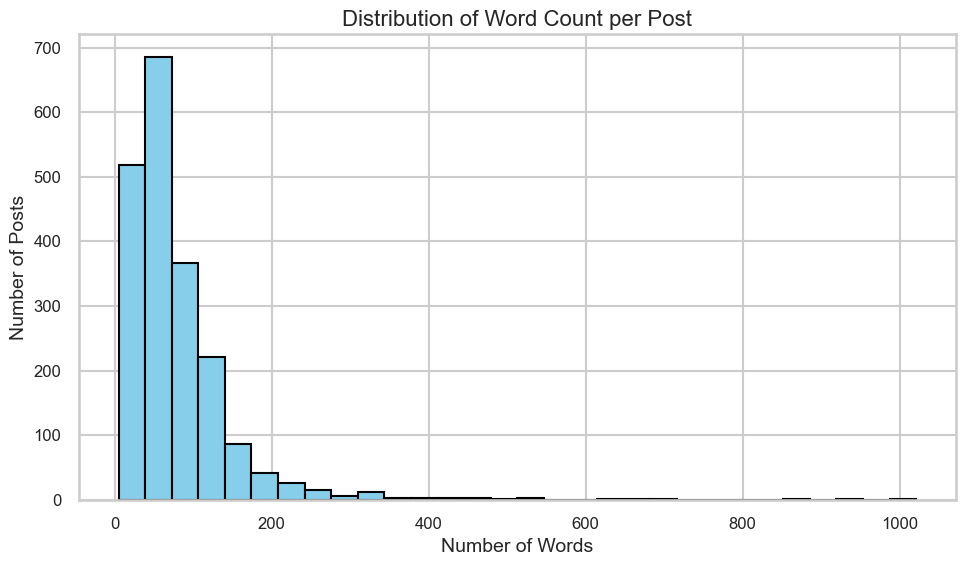

Figure saved as figures/word_count_distribution.png


In [17]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10,6))
plt.hist(df['num_words'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Count per Post", fontsize=16)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save figure
filename = "figures/word_count_distribution.png"
plt.savefig(filename, dpi=300)
plt.show()
print(f"Figure saved as {filename}")

In [18]:
# --- Numeric summaries ---
print("\n--- Descriptive Statistics: Posts ---")
print(df[['score', 'num_comments']].describe())


--- Descriptive Statistics: Posts ---
             score  num_comments
count  2006.000000   2006.000000
mean      7.902792     16.224327
std      53.278350     25.497592
min       0.000000      0.000000
25%       1.000000      4.000000
50%       2.000000      9.000000
75%       5.000000     19.000000
max    2110.000000    323.000000
